# Mentale Gezondheid

Student names: Justin van Egmond, Noor Verbrugge & Douwe Maljers

Team number: 32

## Het gebruik van sociale media veroorzaakt diverse problemen

In het dagelijks gebruik zijn sociale media niet weg te krijgen. Het is een nieuwe norm geworden, wanneer men iets ziet dat te delen online. Vroeger had men vooral contact als ze elkaar fysiek zagen. Dat geeft ook een druk op mensen om altijd beschikbaar te zijn. In die tijd zouden ze eigenlijk met andere dingen bezig moeten zijn. Hun aandacht, focus en behoeftes worden geschoven, wat zorgt voor een verschuiving in prioriteiten. Een argument daarbij is dan ook dat het gebruik van sociale media diversie problemen veroorzaakt, zoals slechter presteren op school, slaapproblemen en internetverslaving.


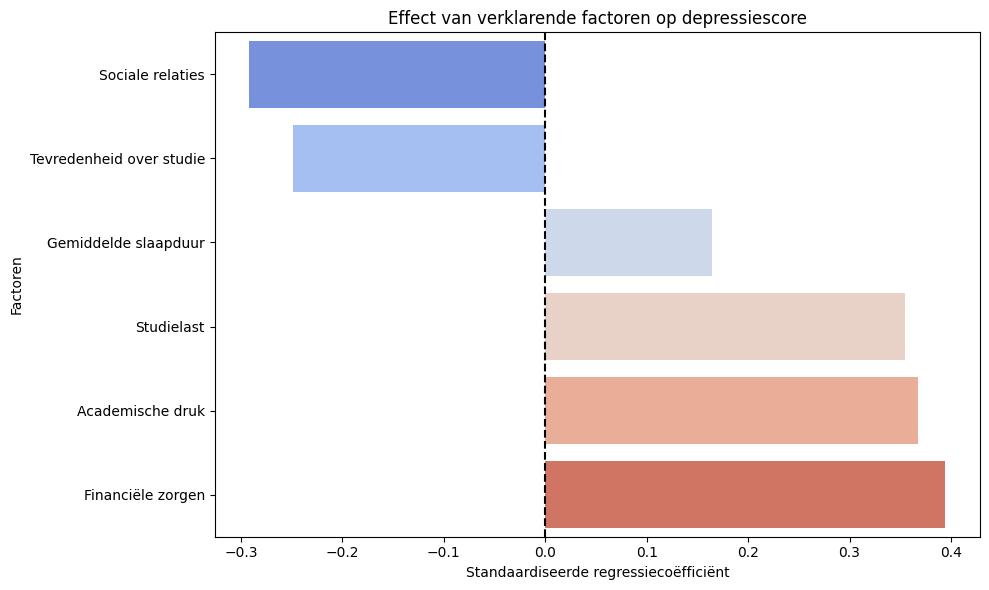

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# ⬇️ Laad je dataset (pas het pad aan naar jouw bestand)
da = pd.read_csv("datasets/MentalHealthSurvey.csv")

# 🔃 Voeg handmatig kolomnamen toe
da.columns = [
    'gender', 'age', 'university', 'degree_level', 'degree_major', 'academic_year',
    'cgpa', 'residential_status', 'campus_discrimination', 'sports_engagement',
    'average_sleep', 'study_satisfaction', 'academic_workload', 'academic_pressure',
    'financial_concerns', 'social_relationships', 'depression', 'anxiety',
    'isolation', 'future_insecurity', 'stress_relief_activities'
]

# 🔢 CGPA converteren naar gemiddelde getal
def convert_cgpa(value):
    if isinstance(value, str) and "-" in value:
        try:
            low, high = value.split("-")
            return (float(low) + float(high)) / 2
        except:
            return None
    try:
        return float(value)
    except:
        return None

da['cgpa'] = da['cgpa'].apply(convert_cgpa)

# 💤 Slaaprange converteren naar getal
def convert_sleep(value):
    if isinstance(value, str) and "-" in value:
        try:
            nums = [int(s.replace("hrs", "").strip()) for s in value.split("-")]
            return sum(nums) / len(nums)
        except:
            return None
    try:
        return float(value)
    except:
        return None

da['average_sleep'] = da['average_sleep'].apply(convert_sleep)

# 🔢 Definieer relevante variabelen
features = [
    'academic_workload',
    'academic_pressure',
    'financial_concerns',
    'study_satisfaction',
    'social_relationships',
    'average_sleep'
]
target = 'depression'

# 🧼 Filter en converteer naar numeriek
reg_df = da[features + [target]].dropna().astype(float)

# 🧪 X en y scheiden
X = reg_df[features]
y = reg_df[target]

# 🧮 Standaardiseren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔁 Lineaire regressie
model = LinearRegression()
model.fit(X_scaled, y)

# 📊 Coëfficiënten berekenen
coefs = pd.Series(model.coef_, index=features).sort_values()

# 🏷️ Vervang variabelnamen door leesbare labels
rename_map = {
    'academic_workload': 'Studielast',
    'academic_pressure': 'Academische druk',
    'financial_concerns': 'Financiële zorgen',
    'study_satisfaction': 'Tevredenheid over studie',
    'social_relationships': 'Sociale relaties',
    'average_sleep': 'Gemiddelde slaapduur'
}
coefs.index = coefs.index.map(rename_map)
bar_df = pd.DataFrame({
    "Variabele": coefs.index,
    "Waarde": coefs.values
})

# 📈 Visualisatie
plt.figure(figsize=(10, 6))
# sns.barplot(x=coefs.values, y=coefs.index, palette="coolwarm", orient='h')
sns.barplot(
    data=bar_df,
    x="Waarde",
    y="Variabele",
    hue="Variabele",                      # nodig om palette te activeren
    palette=sns.color_palette("coolwarm", len(bar_df)),
    orient="h",
    legend=False
)

plt.axvline(0, color='black', linestyle='--')
plt.title("Effect van verklarende factoren op depressiescore")
plt.xlabel("Standaardiseerde regressiecoëfficiënt")
plt.ylabel("Factoren")
plt.tight_layout()
plt.show()


### Schoolprestatie

Studenten zijn al langer bekend om gevoelig te zijn voor mentale stoornissen. Door hoge studielast, sociale druk en financiële moeilijkheden staan zijn erg onder druk. Ook zijn jongeren meer actief op sociale media en worden daardoor ook beïnvloed. Veel studenten geven aan dat hun studieprestaties negatief worden beïnvloed door sociale media. Studenten die aangeven academisch beïnvloed te worden, gebruiken sociale media vaker. 

> *Figuur 2: De correlatie tussen het de gemiddelde gebruiksuren van sociale media en of de student vind dat de acadmische prestatie worden beïnvloed.*

In de tekst boven is de data te zien van studenten die aangeven of hun academische prestaties worden aangetast door het overmatig gebruik van sociale media. In de linker kolom is een significant hoger aantal studenten te zien die wel vindt dat zijn of haar scores minderen. Uit zelf reflectie is een punt te halen dat sociale media een probleem is en niet een vrijwillige actie is. De mentale gezondheid van de student kan hier ook onder lijden door de algoritmes van de apps.

> *Figuur 3: Weergave van de effecten van verschillende effecten op de gemiddeld behaalde cijfers van studenten.*

Zoals eerder benoemd heeft academische druk niet alleen gevolgen op de academische scores maar ook de mentale gezondheid van studenten. Studenten die meer werken voor hoge cijfers hebben sneller last van mentale klachten zoals depressie en stress. Ook is af te lezen dat studenten lagere cijfers sneller geneigd zijn om onzeker te zijn. De studententijd is een tijd waar mensen zich kunnen ontwikkelen en groeien tot de persoon die ze met zelfverzekerheid willen worden. Ook is de prestatiedruk voor studenten met lage cijfer immens hoog.

### Sociale Media

Daarnaast scoren studenten met een hoger dagelijks gebruik vaak lager op mentale gezondheid. Meer gebruik hangt vaak samen met een lagere mentale gezondheidsscore 

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
import kagglehub
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")
csv_path = os.path.join(path, "Students Social Media Addiction.csv")
df = pd.read_csv(csv_path)
df = df.dropna(subset=["Avg_Daily_Usage_Hours", "Mental_Health_Score", "Gender"])

genders = ["Male", "Female"]
colors = {"Male": "blue", "Female": "deeppink", "All": "green"}

# Functie om scatter + regressielijn trace te maken
def get_traces(gender=None):
    if gender:
        d = df[df["Gender"] == gender]
        label = gender
    else:
        d = df
        label = "All"

    # Regressielijn berekenen
    x = d["Avg_Daily_Usage_Hours"]
    y = d["Mental_Health_Score"]
    slope, intercept = np.polyfit(x, y, 1)
    x_vals = np.linspace(x.min(), x.max(), 100)
    y_vals = slope * x_vals + intercept

    # Scatter trace
    scatter = go.Scatter(
        x=x, y=y,
        mode='markers',
        name=f"{label} - data",
        marker=dict(color=colors[label], opacity=0.6),
        showlegend=True
    )

    # Lijn trace
    line = go.Scatter(
        x=x_vals, y=y_vals,
        mode='lines',
        name=f"{label} - trend",
        line=dict(color=colors[label], width=2),
        showlegend=True
    )

    return scatter, line

# Maak alle traces aan (elk 2: scatter + line)
male_traces = get_traces("Male")
female_traces = get_traces("Female")
all_traces = get_traces(None)
all_plot_traces = [*male_traces, *female_traces, *all_traces]

# Vaste assen bepalen op basis van hele dataset
x_min = df["Avg_Daily_Usage_Hours"].min()
x_max = df["Avg_Daily_Usage_Hours"].max()
y_min = df["Mental_Health_Score"].min()
y_max = df["Mental_Health_Score"].max()

# Dropdown menu zonder title updates
buttons = [
    dict(label="Man",
         method="update",
         args=[{"visible": [True, True, False, False, False, False]}]),
    dict(label="Vrouw",
         method="update",
         args=[{"visible": [False, False, True, True, False, False]}]),
    dict(label="Iedereen",
         method="update",
         args=[{"visible": [False, False, False, False, True, True]}])
]

# Plot figuur
fig = go.Figure(data=all_plot_traces)

fig.update_layout(
    title={"text": "Social media gebruik vs. mentale gezondheid"},
    xaxis=dict(
        title="Gemiddeld aantal gebruiksuren van social media per dag",
        range=[x_min - 1, x_max + 1],  # iets marge
        dtick=1,
        fixedrange=True
    ),
    yaxis=dict(
        title="Mentale gezondheidsscore",
        range=[y_min - 1, y_max + 1],
        dtick=1,
        fixedrange=True
    ),
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.01,             # links in beeld
        xanchor="left",
        y=1.15,             # boven de plot
        yanchor="top"
    )]
)

fig.show()


> *Figure 4: Gebruik van sociale media en de mentale gezondheid van mannen en vrouwen.*

De bovenstaande grafiek toont het verband tussen de gemiddelde dagelijkse social media uren per dag (x-as) en de mentale gezondheidsscore van studenten (y-as). Er is een duidelijke negatieve trend zichtbaar in de regessielijn, bij zowel mannen als vrouwen. De mentale gezondheidsscoren daalt naarmate het aantal social media uren meer wordt. Dit betekent dat hoe meer tijd studenten gemiddeld per dag op social media doorbrengen, hoe lager hun mentale gezondheidsscore gemiddeld is, dus meer social media gebruik hangt samen met slechtere mentale gezondheid.

### Slaapgedrag

Mentale gezondheid wordt sterk beïnvloedt door het slaapgedrag.

> *Figure 8: Verschil per geslacht over mentale gezondheid en slaapuren.*

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
import kagglehub
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Dataset ophalen
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")
csv_path = os.path.join(path, "Students Social Media Addiction.csv")
df = pd.read_csv(csv_path)

# Filter op leeftijd en geldige waarden
df_filtered = df[(df['Age'] >= 18) & (df['Age'] <= 25)]
df_filtered = df_filtered.dropna(subset=["Mental_Health_Score", "Sleep_Hours_Per_Night", "Gender"])

# Kleuren
colors = {"Male": "blue", "Female": "deeppink", "All": "green"}

# Functie om groepsgemiddelde lijntrace te maken
def get_line_trace(gender=None):
    if gender:
        d = df_filtered[df_filtered["Gender"] == gender]
        label = gender
    else:
        d = df_filtered
        label = "All"

    df_avg = d.groupby("Sleep_Hours_Per_Night")["Mental_Health_Score"].mean().reset_index()

    return go.Scatter(
        x=df_avg["Sleep_Hours_Per_Night"],
        y=df_avg["Mental_Health_Score"],
        mode='lines+markers',
        name=label,
        line=dict(color=colors[label], width=3),
        visible=True if label == "Male" else False  # standaard alleen Male tonen
    )

# Genereer traces
male_line = get_line_trace("Male")
female_line = get_line_trace("Female")
all_line = get_line_trace(None)

# Dropdown-menu (met correcte title.text)
buttons = [
    dict(label="Man",
         method="update",
         args=[{"visible": [True, False, False]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (mannen)"}}]),
    dict(label="Vrouw",
         method="update",
         args=[{"visible": [False, True, False]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (vrouwen)"}}]),
    dict(label="Iedereen",
         method="update",
         args=[{"visible": [False, False, True]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (alle studenten)"}}]),
    dict(label="Allemaal",
         method="update",
         args=[{"visible": [True, True, True]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (alle groepen)"}}])
]

# Plot figuur
fig = go.Figure(data=[male_line, female_line, all_line])

fig.update_layout(
    title={"text": "Gemiddelde mentale gezondheid per slaapduur (mannen)"},
    xaxis=dict(
        title="Aantal uren slaap per nacht",
        range=[3, 10], 
        dtick=1,
        fixedrange=True
    ),
    yaxis=dict(
        title="Gemiddelde mentale gezondheidsscore",
        range=[3, 10],      
        dtick=1,
        fixedrange=True
    ),
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.01,             # links in beeld
        xanchor="left",
        y=1.15,             # boven de plot
        yanchor="top"
    )]
)

fig.show()




De bovenstaande grafiek toont het verband tussen het aantal uren slaap per nacht (x-as) en de mentale gezondheidsscore van studenten (y-as). Er is een duidelijke positieve trend zichtbaar in de regessielijn, bij zowel mannen als vrouwen. De mentale gezondheidsscoren stijgt naarmate het aantal uren slaap meer wordt. Dit betekent dat hoe meer uren slaap studenten krijgen, hoe hoger hun mentale gezondheidsscore gemiddeld is, dus meer slaap hangt samen met betere mentale gezondheid.

## Sport Gewoontes

In [4]:
import kagglehub
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Download latest version
path = kagglehub.dataset_download("abdullahashfaqvirk/student-mental-health-survey")

# print("Path to dataset files:", path)

csv_path = os.path.join(path, "MentalHealthSurvey.csv") 
df = pd.read_csv(csv_path)
# print(df.head(n=5))

df['sports_engagement'] = pd.Categorical(
    df['sports_engagement'],
    categories=['No Sports','1-3 times', '4-6 times', '7+ times'],
    ordered=True
)
depressie_level = df['depression']
stress_level = df['anxiety']
slaap_level = df['average_sleep']
isolatie = df['isolation']

fig = go.Figure()

fig.add_trace(go.Box(
    x=df['sports_engagement'],
    y=stress_level
))
fig.update_layout(
    title = 'Stress en Sportgewoontes',
    xaxis_title = 'sport level',
    yaxis_title = 'stress',
    xaxis=dict(
        categoryorder='array',
        categoryarray=['No Sports', '1-3 times', '4-6 times', '7+ times']
    )
)

fig.show()



In [5]:
import pandas as pd
import plotly.express as px
import os
import kagglehub
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Dataset ophalen
path = kagglehub.dataset_download("abdullahashfaqvirk/student-mental-health-survey")
csv_path = os.path.join(path, "MentalHealthSurvey.csv")
df = pd.read_csv(csv_path)

# Kolommen numeriek maken
df["depression"] = pd.to_numeric(df["depression"], errors="coerce")
df["academic_pressure"] = pd.to_numeric(df["academic_pressure"], errors="coerce")

# Verwijder missende data
df = df.dropna(subset=["depression", "academic_pressure"])

# Rond waardes af naar hele getallen (voor strakke bins zonder gaten)
df["depression_rounded"] = df["depression"].round(0).astype(int)
df["academic_pressure_rounded"] = df["academic_pressure"].round(0).astype(int)

# Heatmap maken met hele getallen als bins (en netjes op volgorde)
fig = px.density_heatmap(
    df,
    x="depression_rounded",
    y="academic_pressure_rounded",
    title="Dichtheidskaart: Depressie vs Academische druk (afgerond)",
    labels={
        "depression_rounded": "Depressieniveau",
        "academic_pressure_rounded": "Academische druk"
    },
    template="plotly_white",
    color_continuous_scale="tealrose"
)

# Zorg dat de assen getallen zijn (en niet categorisch) zonder ruimtes
fig.update_xaxes(
    type="linear",
    tickmode="linear",
    dtick=1
)
fig.update_yaxes(
    type="linear",
    tickmode="linear",
    dtick=1
)

fig.update_traces(xgap=0, ygap=0)  # 🟢 Dit verwijdert de ruimtes tussen de blokjes

fig.show()